In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
## Drop unnecesarrt columns
df.drop(columns=["year","Unnamed: 0","month"],axis=1,inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

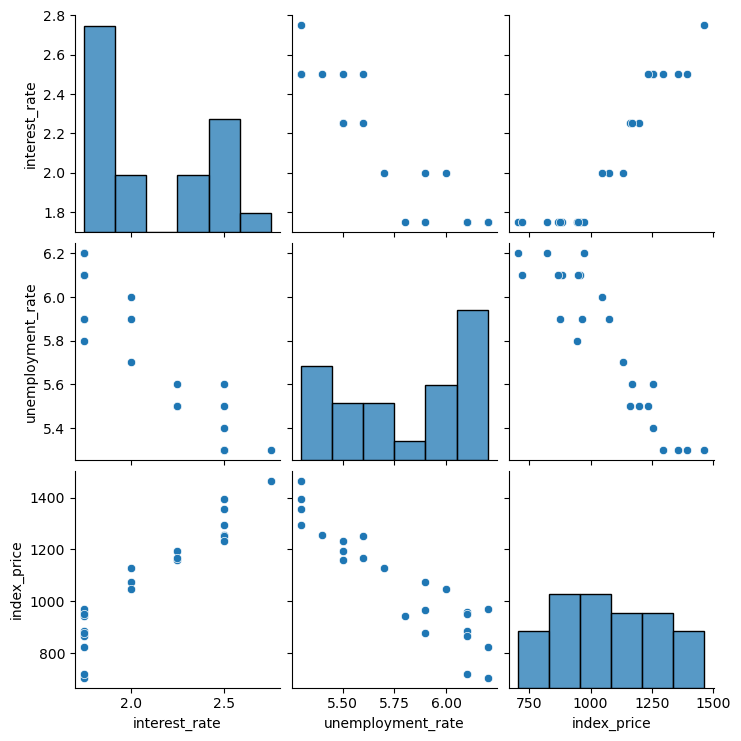

In [6]:
## Visualization
import seaborn as sns
sns.pairplot(df)

In [7]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployement_rate')

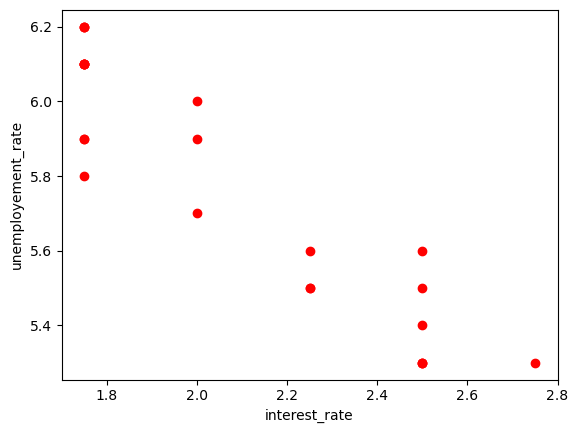

In [8]:
## Visualization in clear manner
plt.scatter(df["interest_rate"],df["unemployment_rate"],color="r")
plt.xlabel("interest_rate")
plt.ylabel("unemployement_rate")

In [9]:
## Get dependent and indepentdent features
x= df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=42)


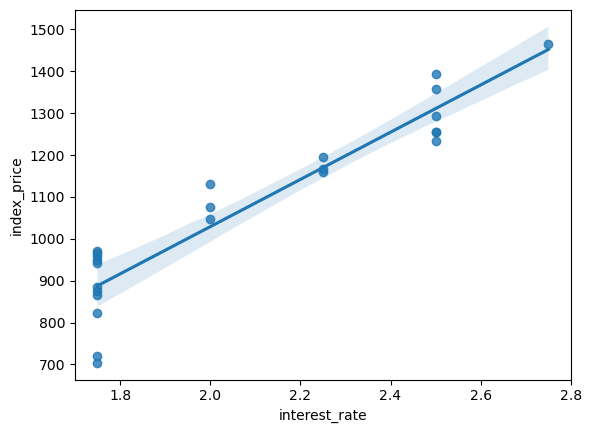

In [11]:
sns.regplot(x=df["interest_rate"],y=df["index_price"])
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
model.fit(xtrain,ytrain)

LinearRegression()

In [16]:
#Cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(model,xtrain,ytrain,scoring="neg_mean_squared_error",cv=3)

# total//5 => total datapoins for taining splits to and remainng to test

In [17]:
np.mean(validation_score)

np.float64(-5914.828180162388)

In [18]:
## prediction
ypred = model.predict(xtest)
ypred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(ytest,ypred)
mae  = mean_absolute_error(ytest,ypred)
rmse = root_mean_squared_error(ytest,ypred)
print(mse,"\n",mae,"\n",rmse)

5793.762887712579 
 59.935781523235526 
 76.11677139574812


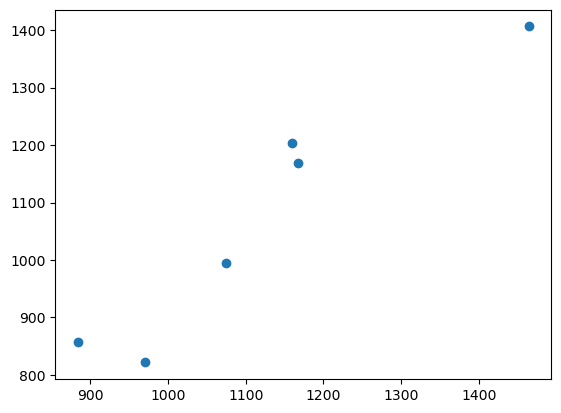

In [20]:
plt.scatter(ytest,ypred)
plt.show()

In [26]:
residuals = ytest-ypred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


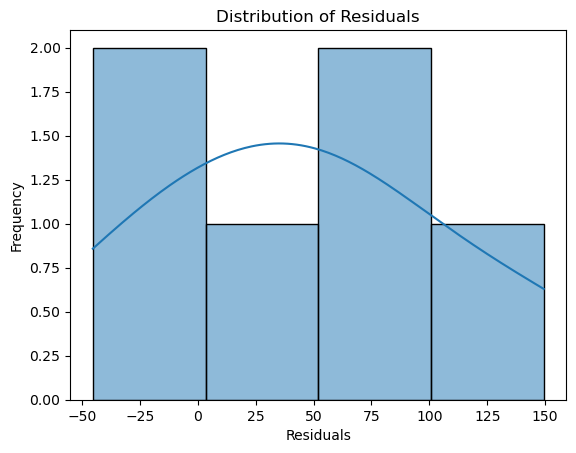

In [30]:
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


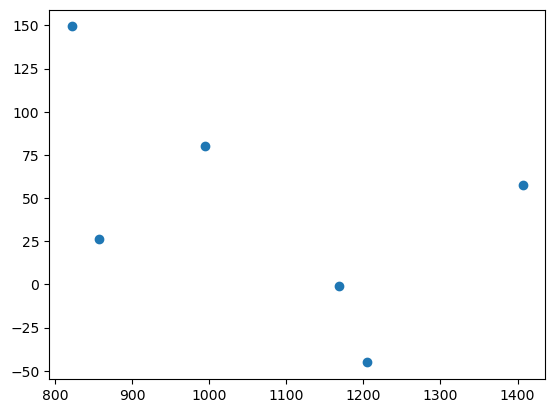

In [31]:
# Scatter plot w.r.t prediction and residulas
plt.scatter(ypred,residuals)
plt.show()